In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn import svm

import os

dataset = pd.read_excel('/Users/alexagrebenstein/Downloads/Volumetric_features.xlsx')

X = dataset.drop(["Age","dataset","S.No"], axis=1)
y = dataset.Age.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

lr = sm.OLS(y_train, X_train_sm).fit()
y_train_pred = lr.predict(X_train_sm)
y_test_pred = lr.predict(X_test_sm)

lr.summary()

/Users/alexagrebenstein/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     159.2
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:49:45   Log-Likelihood:                -11582.
No. Observations:                3380   AIC:                         2.342e+04
Df Residuals:                    3252   BIC:                         2.420e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                   101.3550     16.300      6.218      0.000      69.396     133.314
Left-Lateral-Ventricle                   -0.0067      0.001     -8.636      0.000      -0.008      -0.005
Left-Inf-Lat-Vent                        -0.0046      0.001     -4.927      0.000      -0.006      -0.003
Left-Cerebellum-White-Matter           4.136e-05      0.001      0.079      0.937      -0.001       0.001
Left-Cerebellum-Cortex                   -0.0003      0.000     -1.004      0.315      -0.001       0.000
Left-Thalamus                            -0.0071      0.001    -11.255      0.000      -0.008      -0.006
Left-Caudate                             -0.0051      0.001     -6.182      0.000      -0.007      -0.003
Left-Putamen                             -0.0066      0.001     -8.261      0.000      -0.008      -0.005
Left-Pallidum                            -0.0018      0.001     -1.717      0.086      -0.004       0.000
3rd-Ventricle                            -0.0035      0.001     -3.740      0.000      -0.005      -0.002
4th-Ventricle                            -0.0082      0.001    -10.179      0.000      -0.010      -0.007
Brain-Stem                                0.0023      0.000     21.032      0.000       0.002       0.003
Left-Hippocampus                         -0.0045      0.001     -5.178      0.000      -0.006      -0.003
Left-Amygdala                            -0.0096      0.001     -8.160      0.000      -0.012      -0.007
CSF                                      -0.0067      0.001     -7.206      0.000      -0.009      -0.005
Left-Accumbens-area                      -0.0118      0.002     -5.432      0.000      -0.016      -0.008
Left-VentralDC                           -0.0063      0.001     -6.345      0.000      -0.008      -0.004
Left-vessel                               0.0270      0.004      6.116      0.000       0.018       0.036
Left-choroid-plexus                      -0.0036      0.001     -2.428      0.015      -0.006      -0.001
Right-Lateral-Ventricle                  -0.0068      0.001     -8.777      0.000      -0.008      -0.005
Right-Inf-Lat-Vent                       -0.0078      0.001     -7.567      0.000      -0.010      -0.006
Right-Cerebellum-White-Matter            -0.0001      0.001     -0.248      0.804      -0.001       0.001
Right-Cerebellum-Cortex                  -0.0002      0.000     -0.692      0.489      -0.001       0.000
Right-Thalamus                           -0.0078      0.001    -12.072      0.000      -0.009      -0.007
Right-Caudate                            -0.0042      0.001     -4.794      0.000      -0.006      -0.003
Right-Putamen                            -0.0067      0.001     -8.850      0.000      -0.008      -0.005
Right-Pal

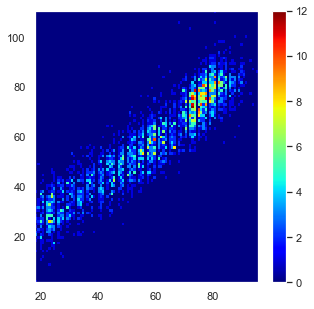

In [8]:
plt.hist2d(y_train, y_train_pred, (100, 100), cmap=plt.cm.jet)
plt.colorbar()
sns.set(rc = {'figure.figsize':(5,7)})

/Users/alexagrebenstein/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


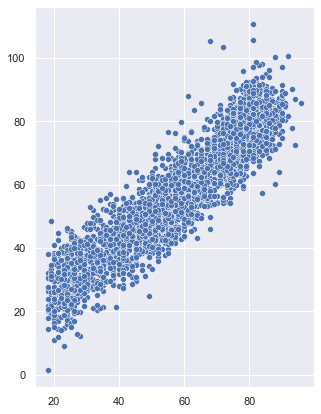

In [9]:
sns.scatterplot(y_train, y_train_pred)
sns.set(rc={'figure.figsize':(5,5)})